In [1]:
# Stock Price Prediction with Machine Learning in Python

In [2]:
import pandas as pd

In [3]:
import pandas_datareader as web

In [4]:
import matplotlib.pyplot as plt

In [5]:
import math

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
import numpy as np

In [8]:
from keras.models import Sequential

In [9]:
from keras.layers import Dense, LSTM

In [10]:
# Get historical Stock Prices of NEMAURA MEDICAL INC. NMRD manufactures and commercializes glucose monitoring systems.

In [11]:
nmrd = web.DataReader('NMRD', data_source='yahoo', start='2018-05-06', end='2021-05-06')

In [12]:
# Plot the NMRD Closing Stock Price History 

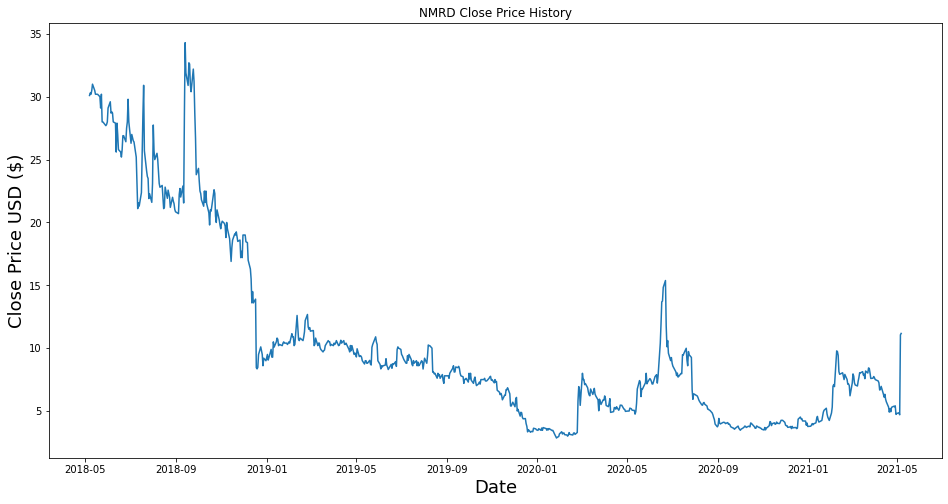

In [13]:
plt.figure(figsize=(16,8))
plt.title('NMRD Close Price History')
plt.plot(nmrd['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [14]:
# Prepare the 80% NMRD dataset for training the Machine Learning Model

In [15]:
OnlyClose = nmrd.filter(['Close'])
CloseValues = OnlyClose.values
TrainingDataSize = math.ceil( len(CloseValues) * 0.8 )

In [16]:
# Start scaling the data

In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(CloseValues)

In [18]:
# Now start creating a training data set and split

In [19]:
training_data_set = scaled_data[0:TrainingDataSize, :]
x_training = []
y_training = []
for i in range(60, len(training_data_set)):
    x_training.append(training_data_set[i-60:i, 0]) 
    y_training.append(training_data_set[i, 0]) 
    if i <= 60:
        print(x_training)
        print(y_training)
        print()

[array([0.86645472, 0.87281399, 0.86963439, 0.87917331, 0.89507156,
       0.87917331, 0.86963439, 0.86963439, 0.86963439, 0.86931641,
       0.86327506, 0.83465822, 0.86963439, 0.79968205, 0.79968205,
       0.79014313, 0.79300482, 0.79968205, 0.83465822, 0.85055647,
       0.82193963, 0.82511923, 0.82193963, 0.79968205, 0.79650239,
       0.72337046, 0.79650239, 0.76788555, 0.72972972, 0.72337046,
       0.71065187, 0.72972972, 0.76470589, 0.76470589, 0.74944358,
       0.7837838 , 0.79968205, 0.85691574, 0.79968205, 0.74562798,
       0.76788555, 0.7519873 , 0.74880764, 0.71065187, 0.64069954,
       0.5802862 , 0.59459459, 0.58664546, 0.62066777, 0.71701113,
       0.81558031, 0.89220987, 0.72655012, 0.67567571, 0.66168523,
       0.65659779, 0.60572337, 0.61780608, 0.59618445, 0.6438792 ])]
[0.7917329292180028]



In [20]:
# Prepare the training data set for the model

In [21]:
x_training, y_training = np.array(x_training), np.array(y_training)
x_training = np.reshape(x_training, (x_training.shape[0], x_training.shape[1], 1))

In [22]:
# Start building and Compile the LSTM Model (Long Short-Term Memory)

In [23]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_training.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
# Now train the model with the previous prepared training data set

In [25]:
model.fit(x_training, y_training, batch_size=1, epochs=7)

Epoch 1/7
545/545 [==============================] - 21s 14ms/step - loss: 0.0111
Epoch 2/7
545/545 [==============================] - 8s 15ms/step - loss: 0.0024
Epoch 3/7
545/545 [==============================] - 9s 17ms/step - loss: 0.0020
Epoch 4/7
545/545 [==============================] - 9s 16ms/step - loss: 0.0019
Epoch 5/7
545/545 [==============================] - 9s 16ms/step - loss: 0.0015
Epoch 6/7
545/545 [==============================] - 9s 16ms/step - loss: 0.0014
Epoch 7/7
545/545 [==============================] - 9s 17ms/step - loss: 0.0012


In [26]:
# Start creating a testing data set 

In [27]:
testing_data = scaled_data[TrainingDataSize - 60:]
x_testing = []
y_testing = CloseValues[TrainingDataSize:, :]
for i in range(60, len(testing_data)):
    x_testing.append(testing_data[i-60:i, 0])

In [28]:
# Prepare testing data for the model

In [29]:
x_testing = np.array(x_testing)
x_testing = np.reshape(x_testing, (x_testing.shape[0], x_testing.shape[1], 1))

In [30]:
# Get the Predicted Stock Price Values for the test data set

In [31]:
predictions = model.predict(x_testing)
predictions = scaler.inverse_transform(predictions)

In [32]:
# Evaluate the model by calculating the RMSE

In [33]:
rmse = np.sqrt( np.mean( predictions - y_testing )**2 )
print(rmse)

0.21903150602681748


In [34]:
pd.set_option('mode.chained_assignment', None)

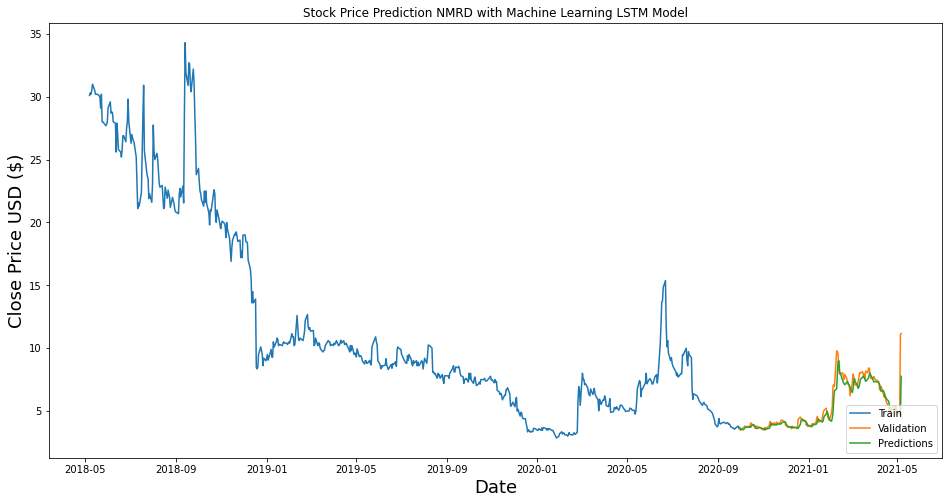

In [35]:
train = OnlyClose[:TrainingDataSize]
valid = OnlyClose[TrainingDataSize:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Stock Price Prediction NMRD with Machine Learning LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()